In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [2]:
data = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')
data2 = data.copy()
data.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [4]:
data['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

In [5]:
data['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

In [6]:
from pandas_profiling import ProfileReport 
profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
data.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

                                             |          | [  0%]   00:00 -> (? left)


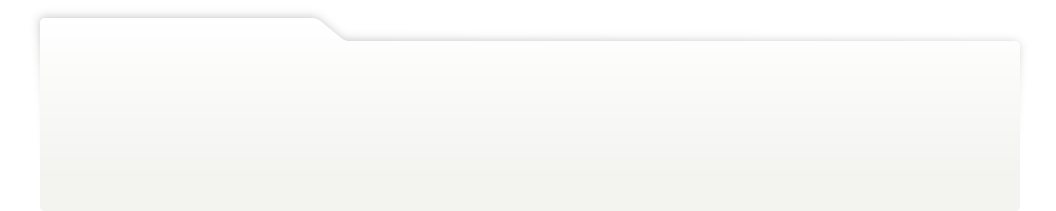
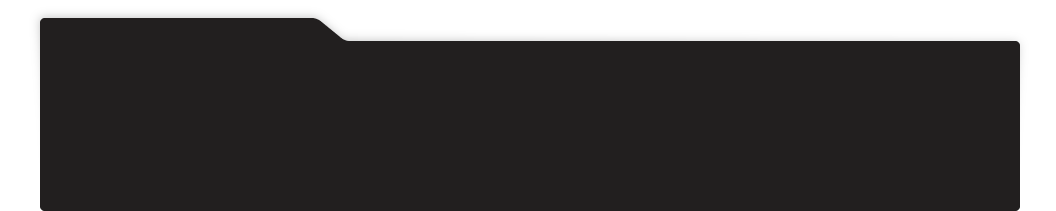
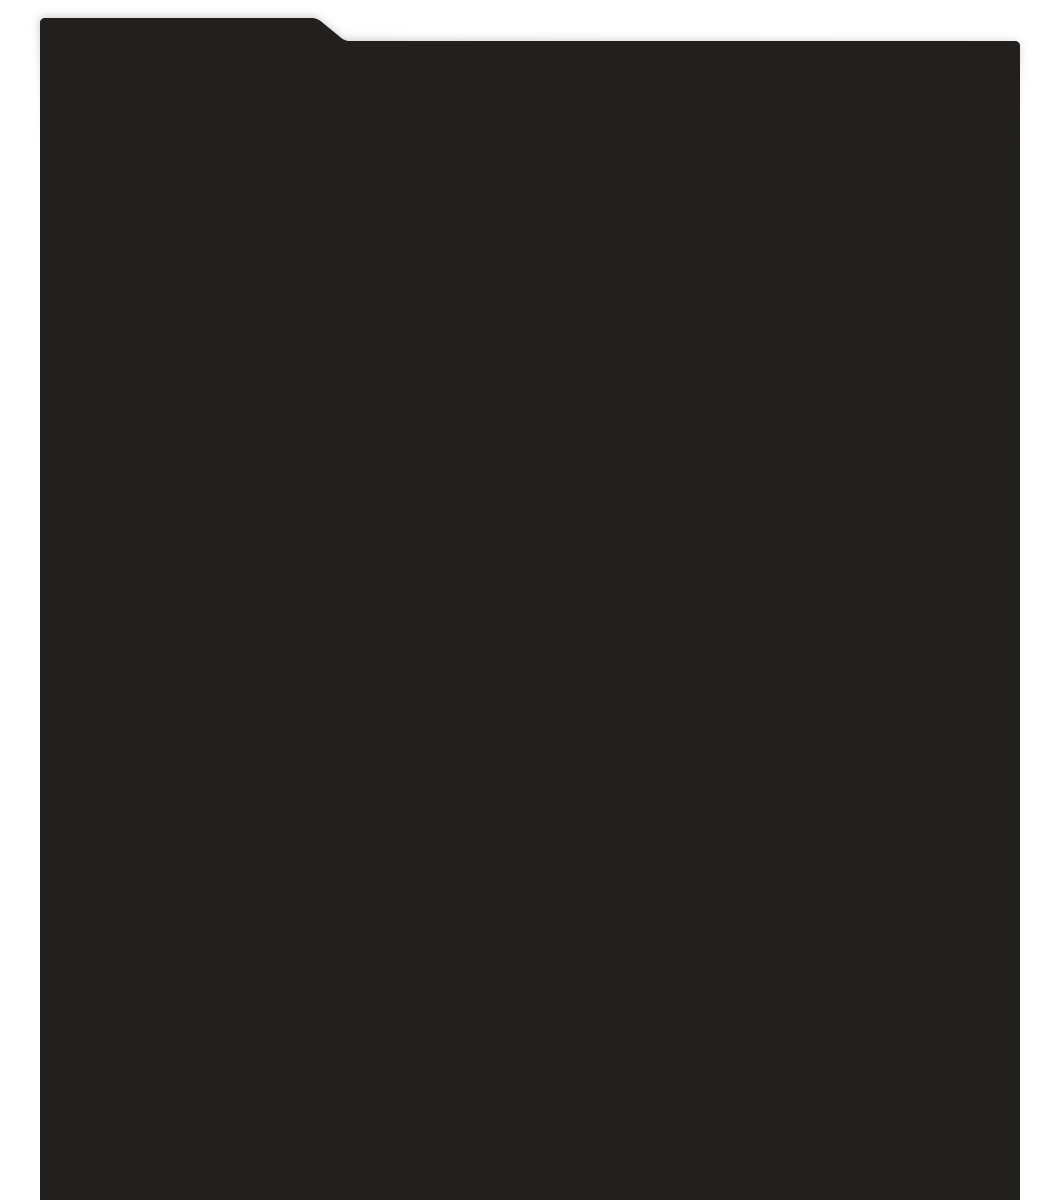
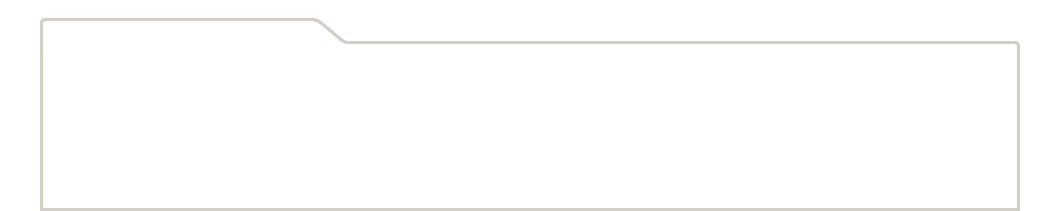
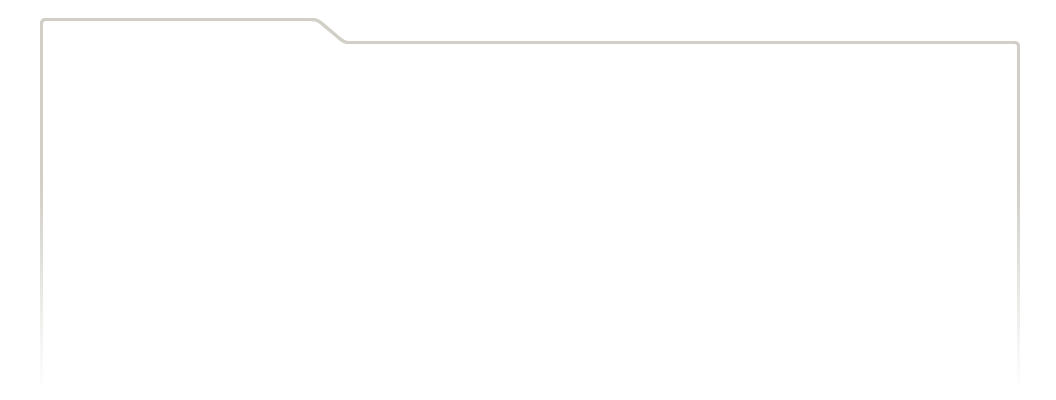
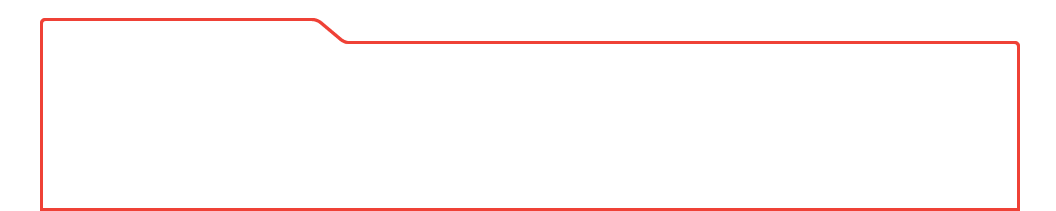
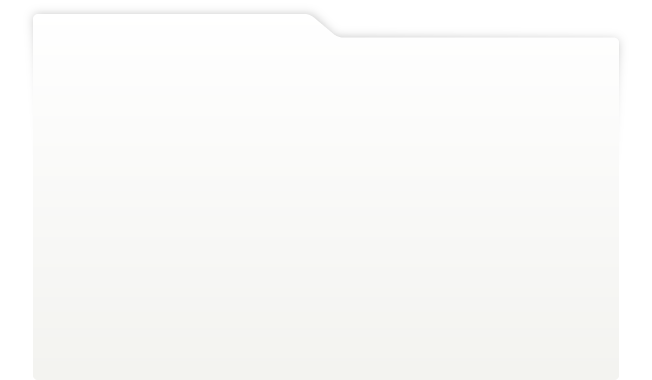
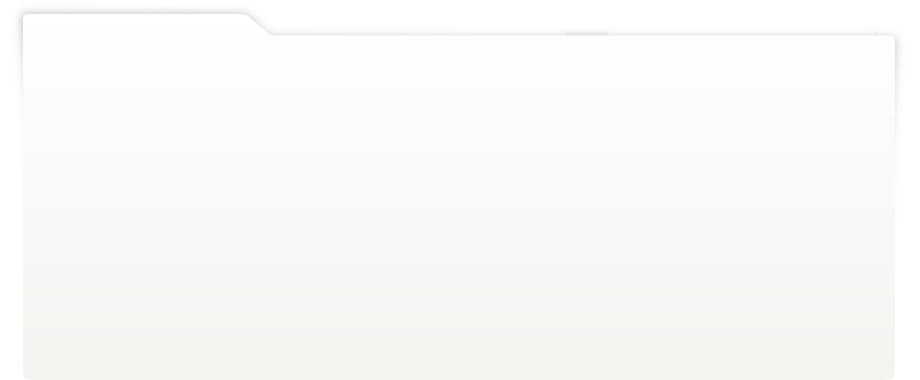
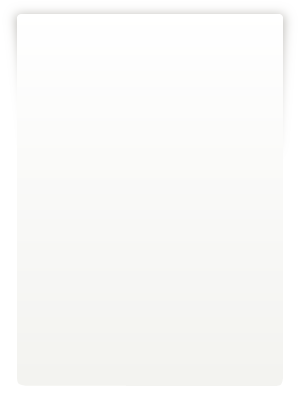
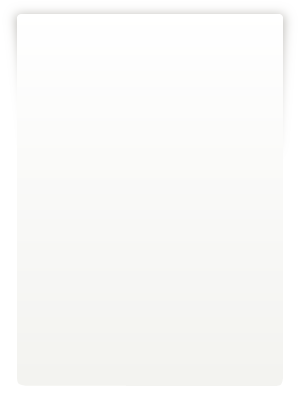
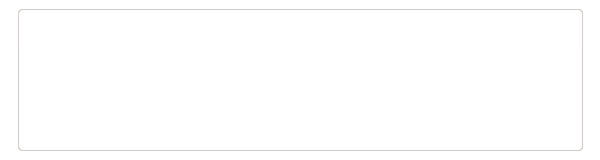
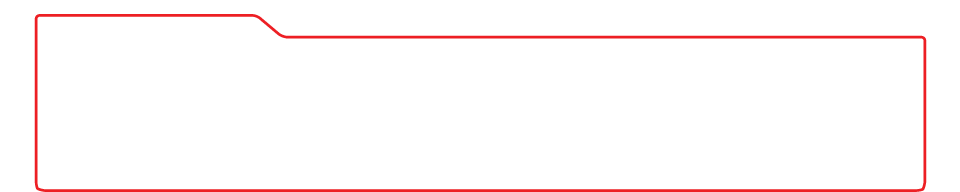
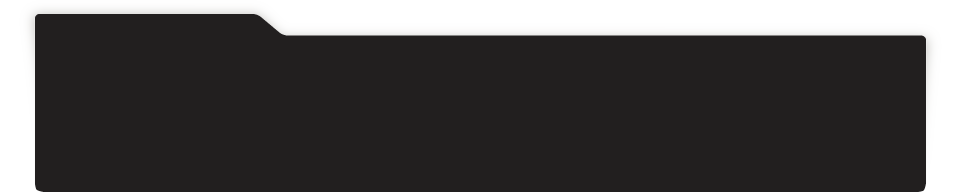
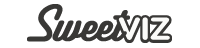
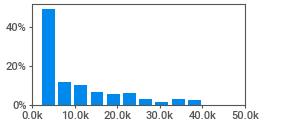
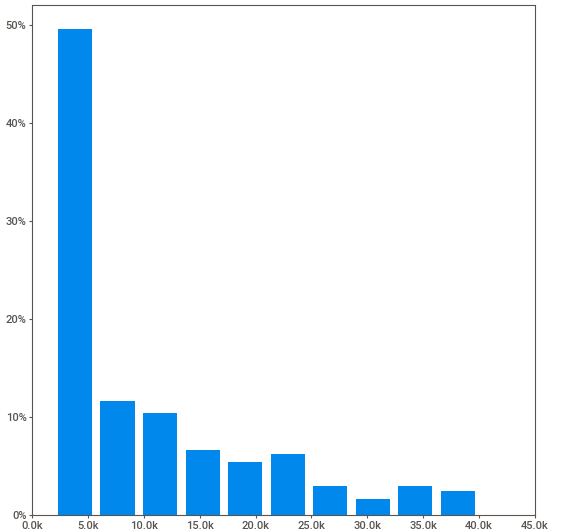
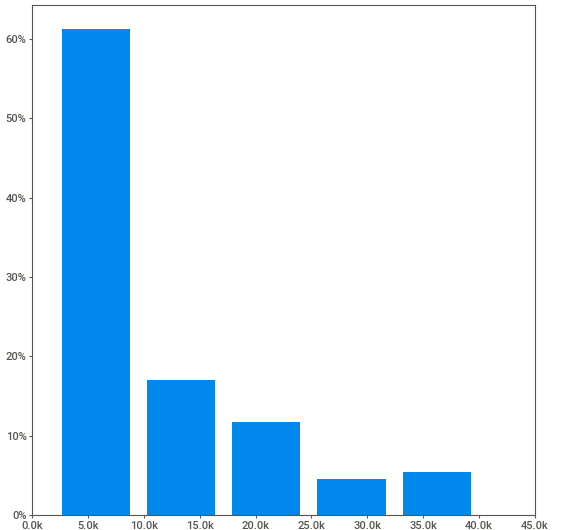
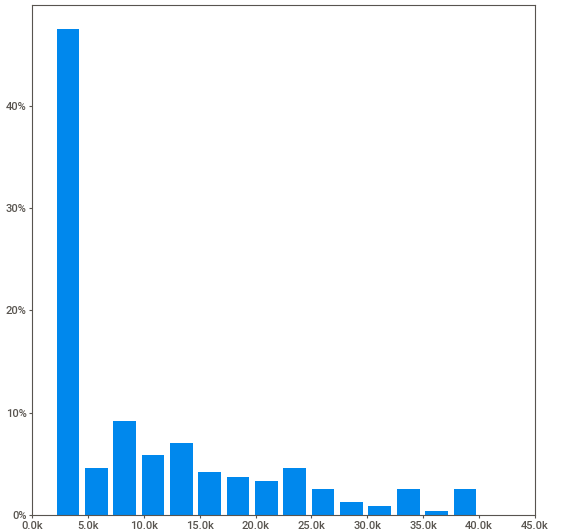
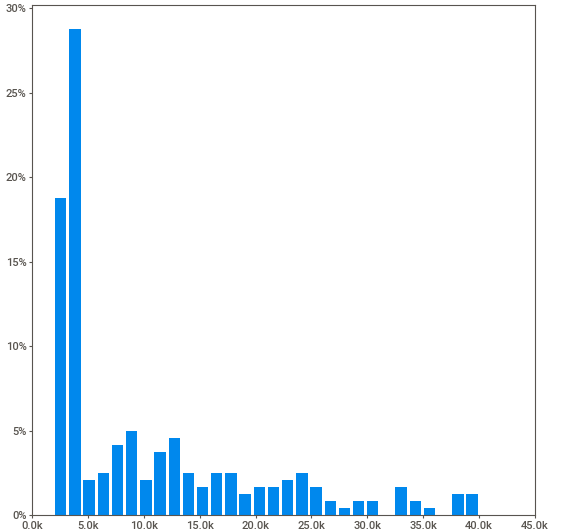
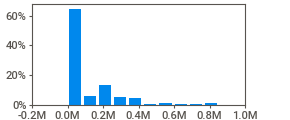
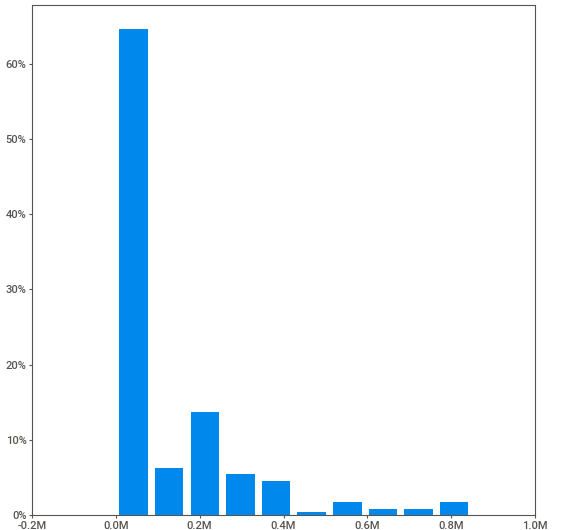
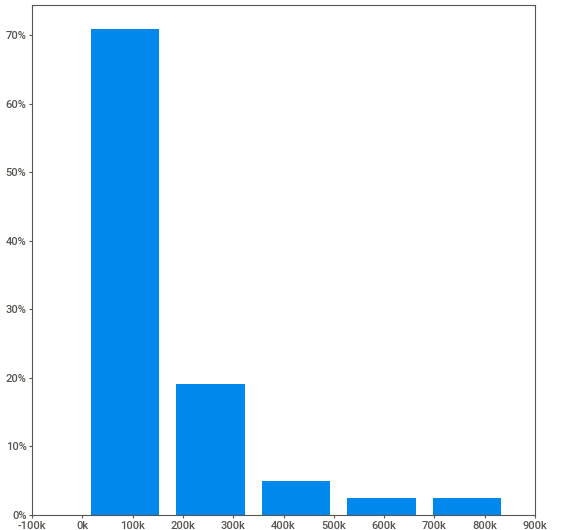
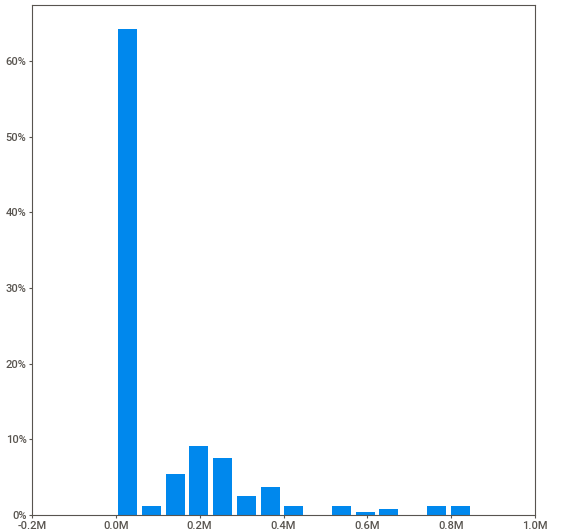
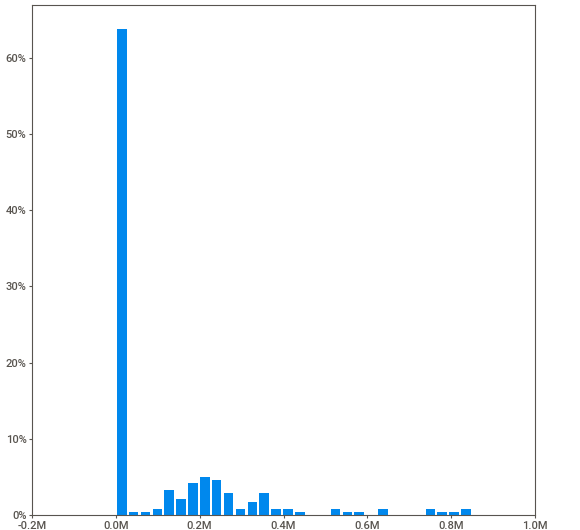
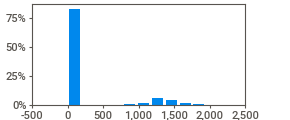
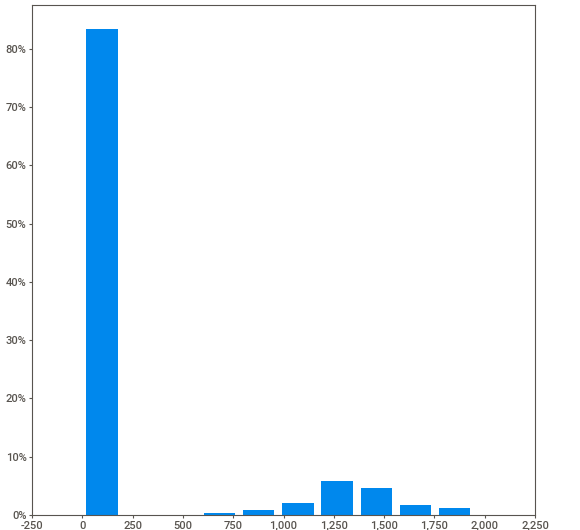
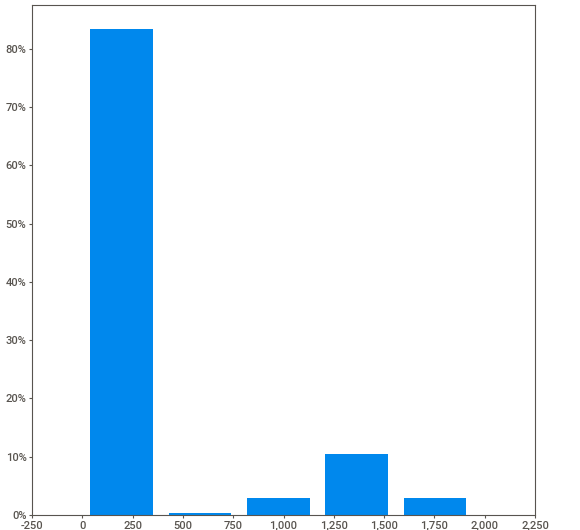
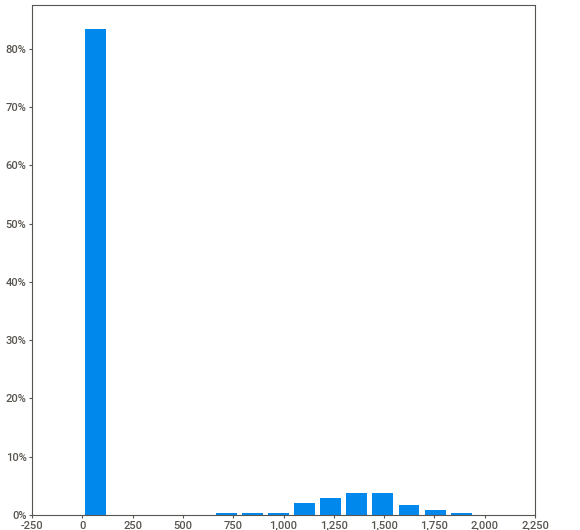
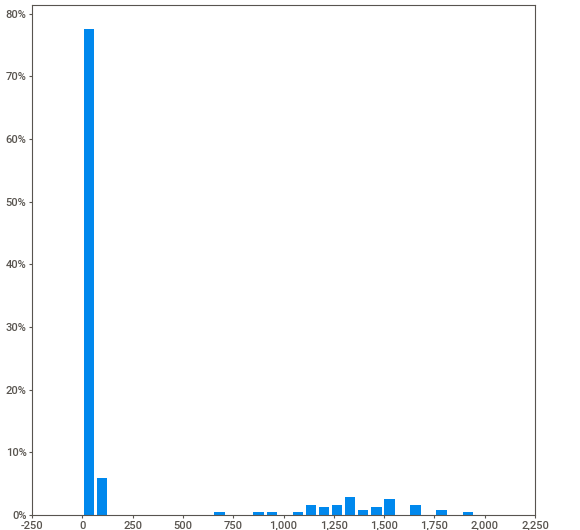
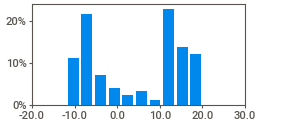
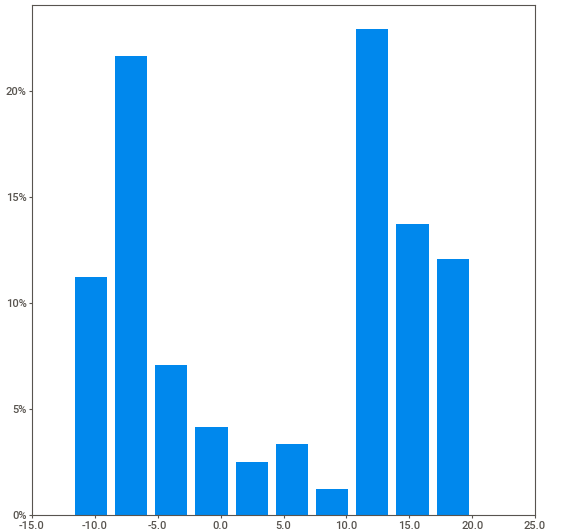
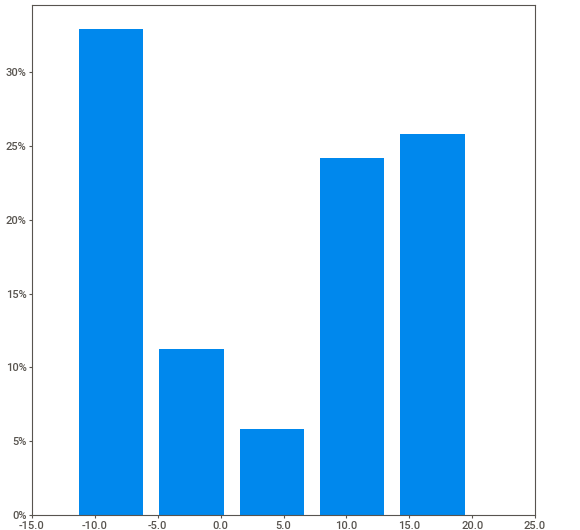
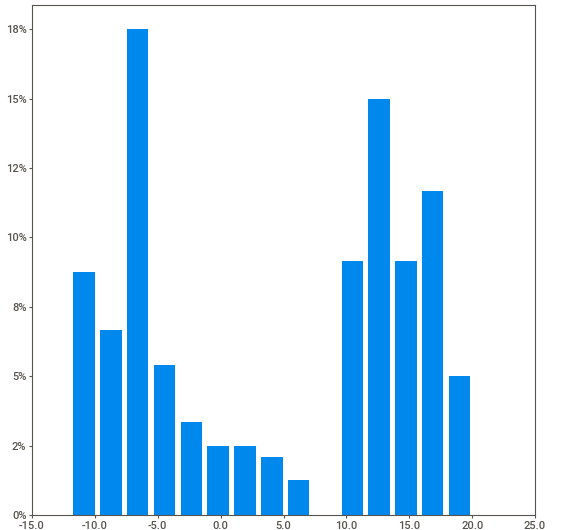
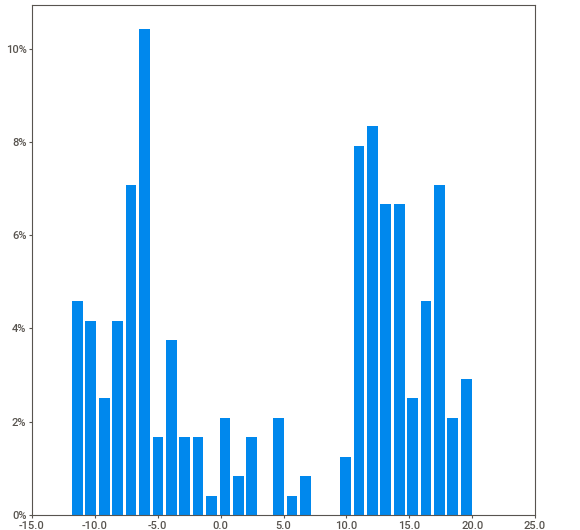
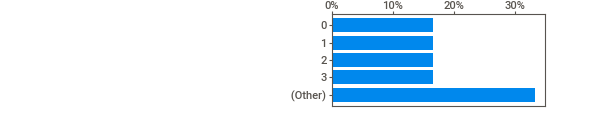
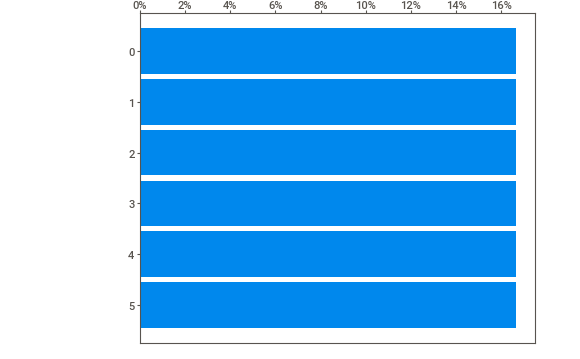
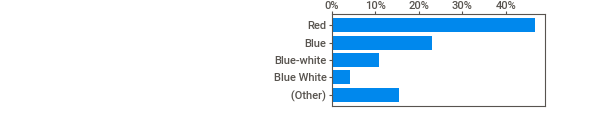
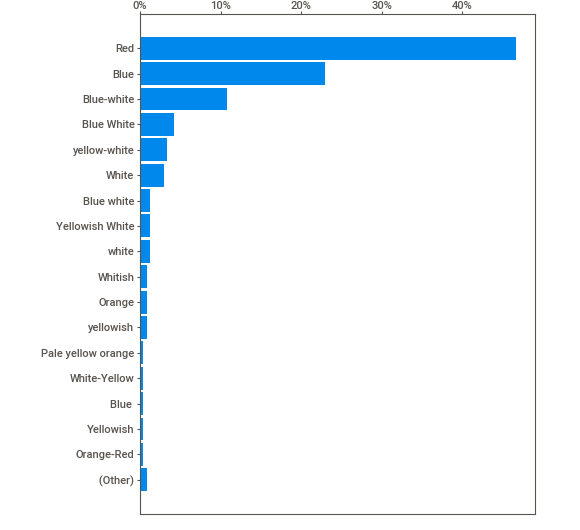
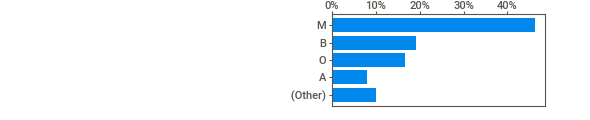
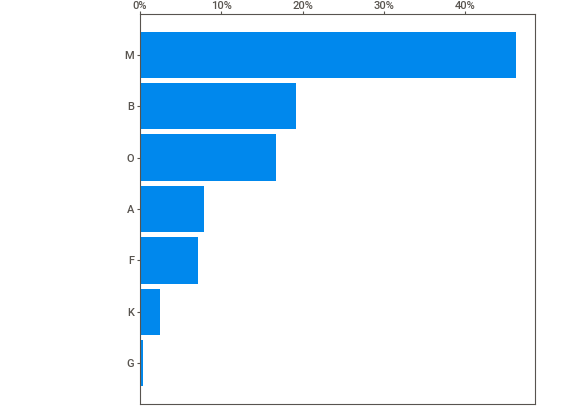
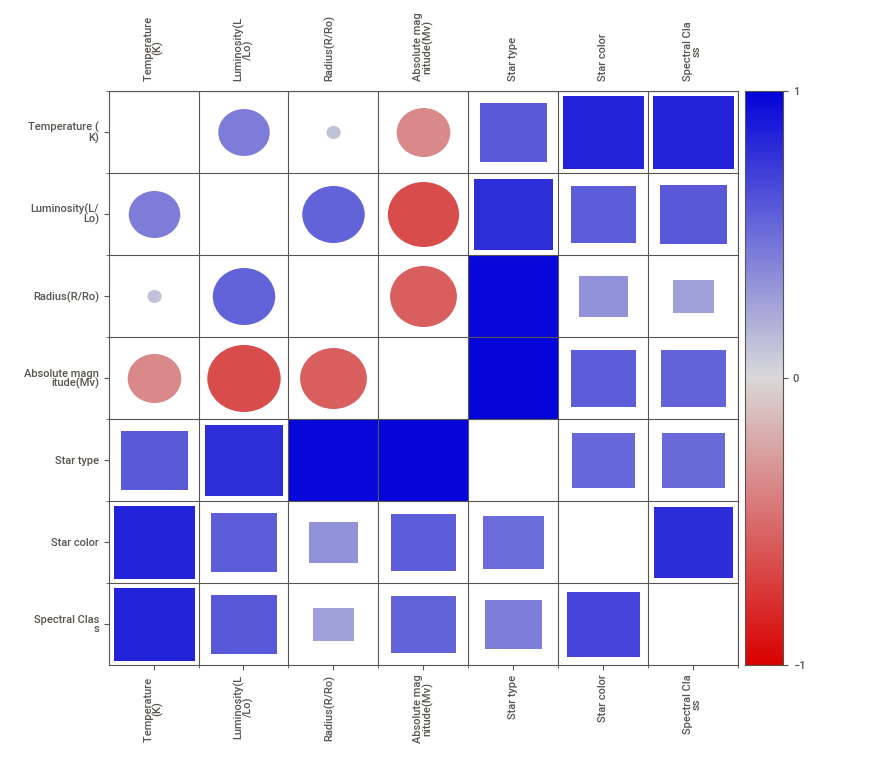
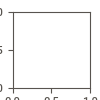

In [9]:
import sweetviz as sv
report = sv.analyze(data)
report.show_notebook()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
le_Star_color = LabelEncoder()
le_Spectral_Class = LabelEncoder()

In [12]:
data['Star color'] = le_Star_color.fit_transform(data['Star color'])
data['Spectral Class'] = le_Spectral_Class.fit_transform(data['Spectral Class'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    int64  
 6   Spectral Class          240 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.2 KB


In [14]:
data2 = data.copy()

In [15]:
X = data.drop('Spectral Class',axis=1)
y = data['Spectral Class']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [18]:
# K nearest neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.8541666666666666
- MCC: 0.7921766173305801
- F1 score: 0.846516115097001
----------------------------------
Model performance for Test set
- Accuracy: 0.6666666666666666
- MCC: 0.5177963982368182
- F1 score: 0.6230010893246187


In [19]:
# Support vector machine (Radial basis function kernel)

from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.4375
- MCC: 0.0
- F1 score: 0.266304347826087


In [20]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.9427083333333334
- MCC: 0.9192473325448883
- F1 score: 0.9431310442086794
----------------------------------
Model performance for Test set
- Accuracy: 0.8958333333333334
- MCC: 0.8584874707594415
- F1 score: 0.872873471557682


In [21]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 0.9375
- MCC: 0.9120674587098313
- F1 score: 0.9301087253389885
----------------------------------
Model performance for Test set
- Accuracy: 0.8333333333333334
- MCC: 0.7688247395647965
- F1 score: 0.8128968253968254


In [22]:
pip install git+https://github.com/pycaret/pycaret.git

  Cloning https://github.com/pycaret/pycaret.git to /tmp/pip-req-build-7ustk_fb
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-7ustk_fb
  Resolved https://github.com/pycaret/pycaret.git to commit c2306ed20b564f4d7fdda05c07bd65155a505cc9
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━

In [23]:
from pycaret.regression import setup, compare_models, predict_model
pycaret_automl = setup(data=data, target = 'Spectral Class', session_id=667)

,Description,Value
0,Session id,667
1,Target,Spectral Class
2,Target type,Regression
3,Data shape,"(240, 7)"
4,Train data shape,"(167, 7)"
5,Test data shape,"(73, 7)"
6,Numeric features,6
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [24]:
pycaret_models = compare_models(sort='MSE', budget_time=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2333,0.2949,0.5114,0.9266,0.1751,0.1033,0.0960
catboost,CatBoost Regressor,0.2827,0.4305,0.5971,0.8943,0.2036,0.1330,0.9980
rf,Random Forest Regressor,0.2685,0.4678,0.6148,0.8856,0.1926,0.1235,0.1310
lightgbm,Light Gradient Boosting Machine,0.3510,0.4930,0.6167,0.8899,0.2091,0.1645,0.1240
gbr,Gradient Boosting Regressor,0.2644,0.5836,0.6068,0.8534,0.2050,0.1249,0.0500
xgboost,Extreme Gradient Boosting,0.2207,0.6498,0.6075,0.8324,0.1966,0.1056,0.1970
ada,AdaBoost Regressor,0.2866,0.7497,0.6644,0.8005,0.2361,0.1382,0.0560
knn,K Neighbors Regressor,0.4661,0.9079,0.9220,0.7769,0.2644,0.2246,0.0460
dt,Decision Tree Regressor,0.2827,1.1643,0.8234,0.6804,0.2575,0.1115,0.0230
lr,Linear Regression,1.2144,2.6851,1.6001,0.3468,0.4928,0.4769,0.3580


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [25]:
print(pycaret_models)

ExtraTreesRegressor(n_jobs=-1, random_state=667)


In [26]:
from sklearn.ensemble import ExtraTreesRegressor

In [27]:
model = ExtraTreesRegressor(n_jobs=-1, random_state=667)
model.fit(X_train,y_train)

ExtraTreesRegressor(n_jobs=-1, random_state=667)

In [28]:
model.score(X_test,y_test)

0.8117176829933457

In [29]:
data3 = data2[['Temperature (K)','Spectral Class']]

y_pred = model.predict(X)
data3['Prediction'] = np.round(y_pred)
data3.head(3)

,Temperature (K),Spectral Class,Prediction
0,3068,5,5.0
1,3042,5,5.0
2,2600,5,5.0


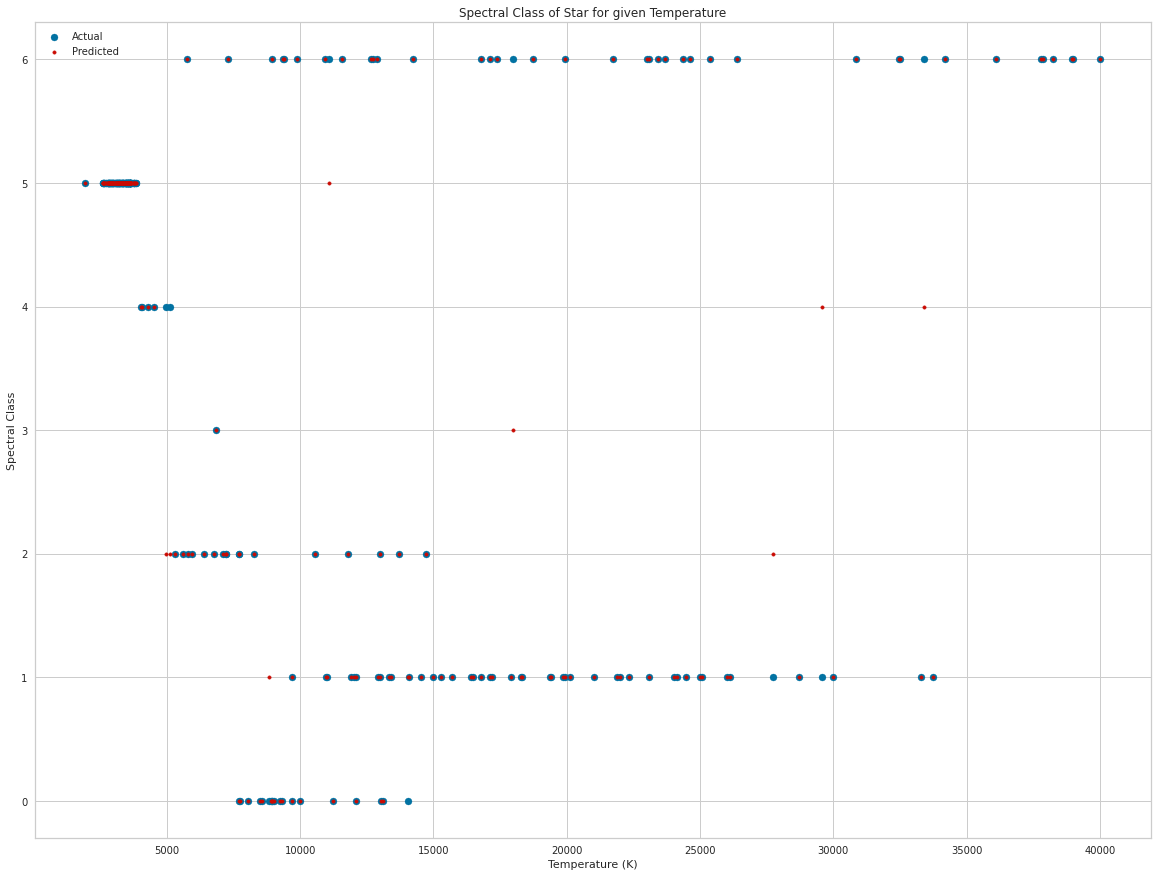

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.scatter(data3['Temperature (K)'],data3['Spectral Class'],label='Actual')
plt.scatter(data3['Temperature (K)'],data3['Prediction'],label='Predicted',color='r',marker='.')
plt.title("Spectral Class of Star for given Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Spectral Class")
plt.legend()
plt.show()

In [31]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.20.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.20.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp63264xwj
  JVM stdout: /tmp/tmp63264xwj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp63264xwj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_5l64lo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.396 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [32]:
h2o_frame = h2o.H2OFrame(data)
x = h2o_frame.columns
y = 'Spectral Class'
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [33]:
h2o_automl = H2OAutoML(sort_metric='mse', max_runtime_secs=5*60, seed=667)
h2o_automl.train(x=x, y=y, training_frame=h2o_frame)

AutoML progress: |█
11:46:57.910: GBM_1_AutoML_1_20220813_114655 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20220813_114655.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 192.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 192.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 192.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 192.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 192.0.


██████████████████████████████████████

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,54.0,54.0,25307.0,7.0,15.0,11.611111,17.0,41.0,32.37037




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.01964813557942235
RMSE: 0.14017180736304413
MAE: 0.06316847803730828
RMSLE: 0.061373548339272783
Mean Residual Deviance: 0.01964813557942235

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.3708328257867505
RMSE: 0.6089604468163351
MAE: 0.26247936645227804
RMSLE: 0.19493192981373383
Mean Residual Deviance: 0.3708328257867505

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.255660,0.049070,0.231441,0.222860,0.210283,0.288583,0.325131
1,mean_residual_deviance,0.374761,0.237469,0.280418,0.231497,0.146162,0.475179,0.740549
2,mse,0.374761,0.237469,0.280418,0.231497,0.146162,0.475179,0.740549
3,r2,0.912214,0.059445,0.936303,0.946700,0.965254,0.897172,0.815643
4,residual_deviance,0.374761,0.237469,0.280418,0.231497,0.146162,0.475179,0.740549
5,rmse,0.588576,0.188212,0.529545,0.481142,0.382311,0.689332,0.860551
6,rmsle,0.188315,0.058572,0.192041,0.104015,0.174723,0.266894,0.203903



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-08-13 11:49:54,32.545 sec,0.0,2.085649,1.907847,4.349931
1,,2022-08-13 11:49:54,32.554 sec,5.0,1.295434,1.165843,1.678149
2,,2022-08-13 11:49:54,32.564 sec,10.0,0.842325,0.727315,0.709511
3,,2022-08-13 11:49:54,32.574 sec,15.0,0.577189,0.461916,0.333147
4,,2022-08-13 11:49:54,32.584 sec,20.0,0.415795,0.299335,0.172886
5,,2022-08-13 11:49:54,32.596 sec,25.0,0.329338,0.205366,0.108464
6,,2022-08-13 11:49:54,32.610 sec,30.0,0.266723,0.148138,0.071141
7,,2022-08-13 11:49:54,32.624 sec,35.0,0.225554,0.112949,0.050875
8,,2022-08-13 11:49:54,32.636 sec,40.0,0.194304,0.092769,0.037754
9,,2022-08-13 11:49:54,32.648 sec,45.0,0.171300,0.080375,0.029344



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Absolute magnitude(Mv),2163.409668,1.000000,0.395517
1,Temperature (K),1711.093872,0.790925,0.312824
2,Star color,685.786194,0.316993,0.125376
3,Star type,427.399292,0.197558,0.078138
4,Radius(R/Ro),263.464050,0.121782,0.048167
5,Luminosity(L/Lo),218.678146,0.101080,0.039979


In [34]:
h2o_models = h2o.automl.get_leaderboard(h2o_automl, extra_columns = "ALL")
h2o_models

model_id,mse,rmse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20220813_114655_model_103,0.370833,0.60896,0.262479,0.194932,0.370833,130,0.023505,GBM
XGBoost_grid_1_AutoML_1_20220813_114655_model_149,0.381274,0.617474,0.291146,0.20914,0.381274,91,0.007715,XGBoost
StackedEnsemble_BestOfFamily_5_AutoML_1_20220813_114655,0.38146,0.617625,0.278114,0.213228,0.38146,719,0.059739,StackedEnsemble
XGBoost_grid_1_AutoML_1_20220813_114655_model_113,0.382952,0.618831,0.271833,0.192906,0.382952,51,0.006671,XGBoost
StackedEnsemble_BestOfFamily_4_AutoML_1_20220813_114655,0.388413,0.623228,0.277066,0.203246,0.388413,116,0.04543,StackedEnsemble
GBM_grid_1_AutoML_1_20220813_114655_model_5,0.388619,0.623393,0.235042,0.202845,0.388619,111,0.026018,GBM
GBM_grid_1_AutoML_1_20220813_114655_model_79,0.395384,0.628795,0.263038,0.205236,0.395384,156,0.025463,GBM
GBM_grid_1_AutoML_1_20220813_114655_model_120,0.404591,0.636075,0.257518,0.207609,0.404591,147,0.024551,GBM
GBM_grid_1_AutoML_1_20220813_114655_model_39,0.410953,0.641056,0.245461,0.201982,0.410953,121,0.021317,GBM
GBM_grid_1_AutoML_1_20220813_114655_model_17,0.410954,0.641057,0.242972,0.198865,0.410954,161,0.019726,GBM


In [35]:
from h2o.model.regression import h2o_mean_squared_error,h2o_explained_variance_score,h2o_r2_score

h2o_frame_test = h2o.H2OFrame(X)

y_pred = h2o_automl.predict(h2o_frame_test)
y_actual = h2o.H2OFrame(data[['Spectral Class']])

h2o_mean_squared_error(y_actual, y_pred)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0.01964812373526529

In [36]:
h2o_explained_variance_score(y_actual,y_pred)

0.9954831178373663

In [37]:
y_pred.shape

(240, 1)

In [38]:
type(y_pred)

h2o.frame.H2OFrame

In [39]:
y_pred = h2o.as_list(y_pred)
type(y_pred)

pandas.core.frame.DataFrame

In [40]:
data_h = data[['Temperature (K)','Spectral Class']]
data_h['y_pred'] = np.round(y_pred)
data_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature (K)  240 non-null    int64  
 1   Spectral Class   240 non-null    int64  
 2   y_pred           240 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.8 KB


In [41]:
data_h.head()

,Temperature (K),Spectral Class,y_pred
0,3068,5,5.0
1,3042,5,5.0
2,2600,5,5.0
3,2800,5,5.0
4,1939,5,5.0


In [42]:
data_h.isna().sum()

Temperature (K)    0
Spectral Class     0
y_pred             0
dtype: int64

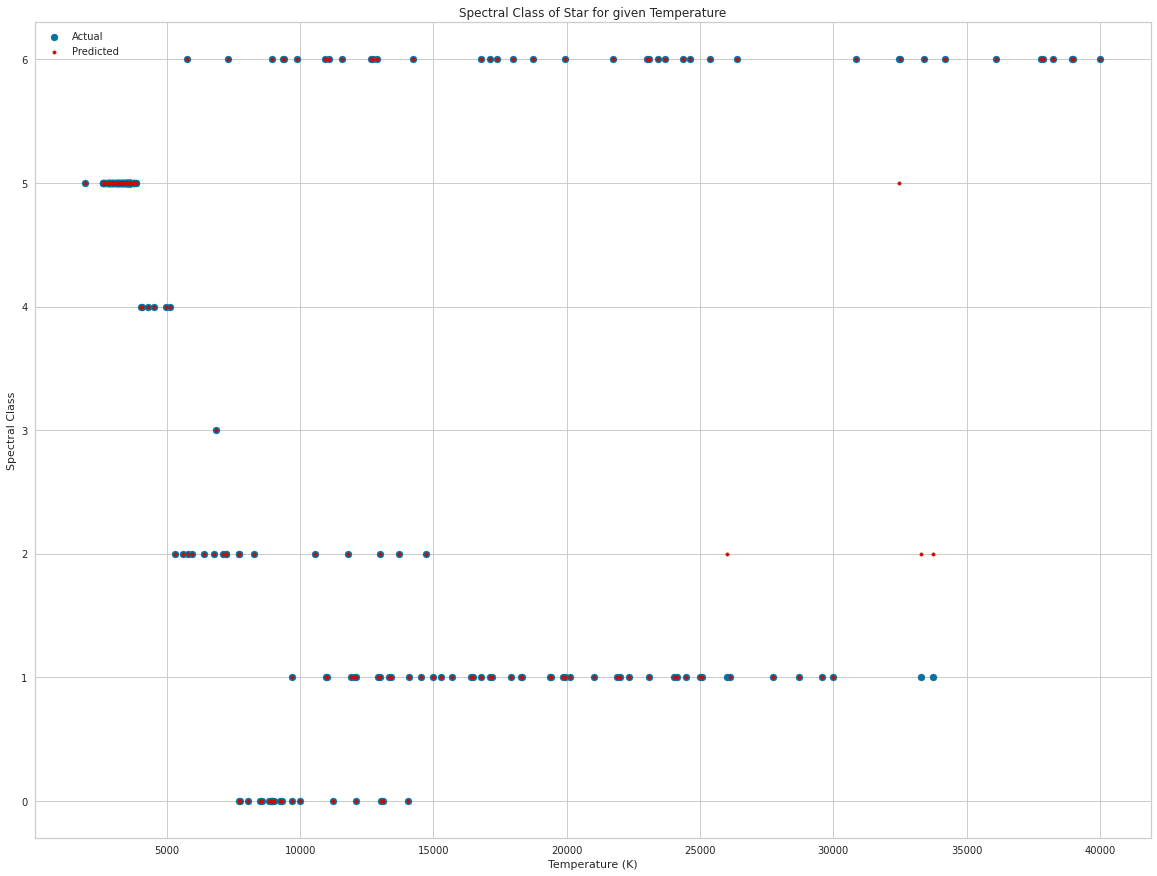

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.scatter(data_h['Temperature (K)'],data_h['Spectral Class'],label='Actual')
plt.scatter(data_h['Temperature (K)'],data_h['y_pred'],label='Predicted',color='r',marker='.')
plt.title("Spectral Class of Star for given Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Spectral Class")
plt.legend()
plt.show()

In [44]:
from tpot import TPOTClassifier

tpot_automl = TPOTClassifier(generations=5, population_size=50, cv=5, scoring='accuracy', verbosity=2, random_state=667, n_jobs=-1)

In [45]:
tpot_automl.fit(X_train, y_train)
tpot_automl.score(X_test, y_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9224021592442645

Generation 2 - Current best internal CV score: 0.9273954116059379


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selecti


Generation 3 - Current best internal CV score: 0.9327935222672064


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selecti


Generation 4 - Current best internal CV score: 0.9327935222672064

Generation 5 - Current best internal CV score: 0.9379217273954115

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=2, max_features=0.45, min_samples_leaf=14, min_samples_split=10, n_estimators=100, subsample=0.7000000000000001)


0.9375

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
model_best_2 = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, max_features=0.45, min_samples_leaf=14, min_samples_split=10, n_estimators=100, subsample=0.7000000000000001)

In [47]:
model_best_2.fit(X_train,y_train)
model_best_2.score(X_test,y_test)

0.9375

In [48]:
data4 = data2[['Temperature (K)','Spectral Class']]

y_pred = model_best_2.predict(X)
data3['Prediction'] = y_pred
data3.head(3)

,Temperature (K),Spectral Class,Prediction
0,3068,5,5
1,3042,5,5
2,2600,5,5


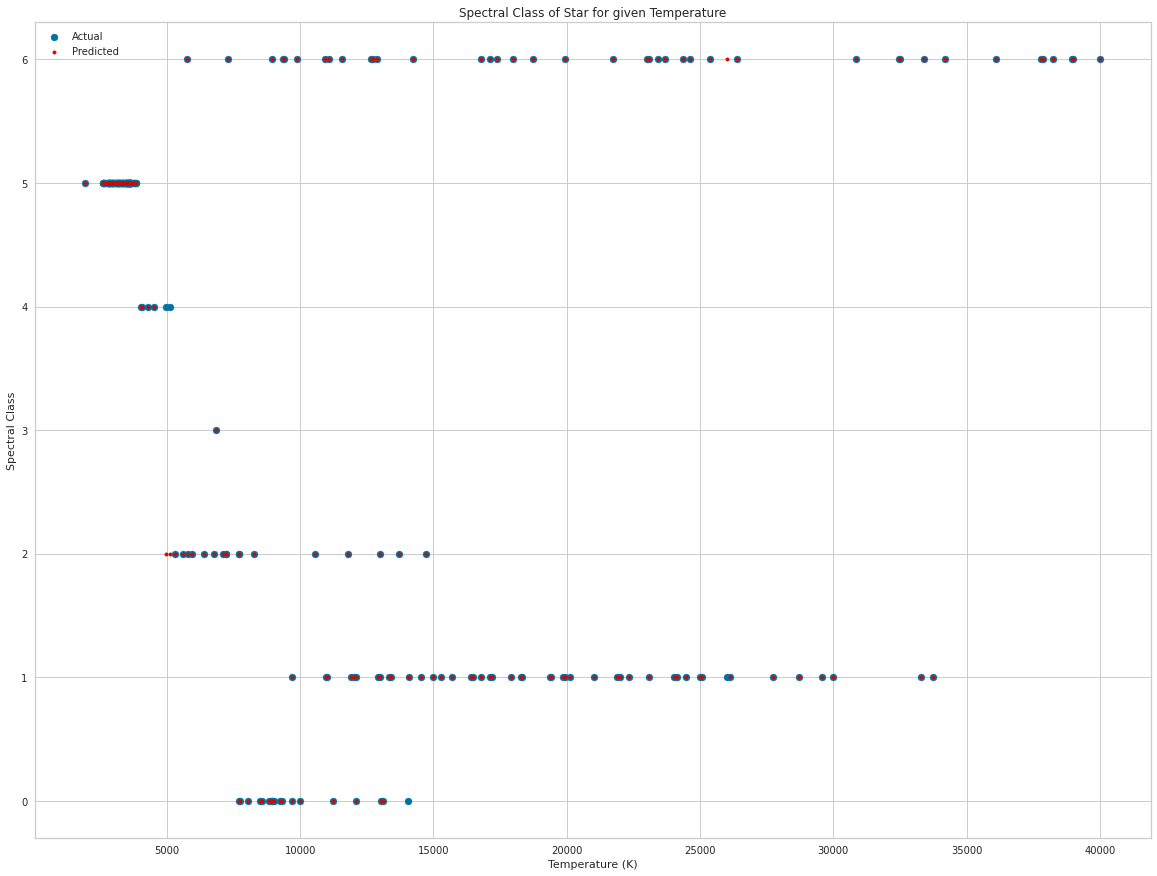

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.scatter(data3['Temperature (K)'],data3['Spectral Class'],label='Actual')
plt.scatter(data3['Temperature (K)'],data3['Prediction'],label='Predicted',color='r',marker='.')
plt.title("Spectral Class of Star for given Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Spectral Class")
plt.legend()
plt.show()